In [246]:
## REQUIRED LIBRARIES
# For data wrangling
import pandas as pd
import numpy as np

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode

# For preprocessing and modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

#Model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score




init_notebook_mode(connected=True)



In [247]:
df = pd.read_csv('customer_churn_dataset.csv')
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,Churn
0,Cust_1,Male,0.0,Yes,No,2.0,Yes,No,NaN,No,No internet service,1
1,Cust_2,Female,1.0,No,No,NaN,Yes,No,Fiber optic,Yes,Yes,0


In [248]:
df.shape

(10000, 12)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customerID       10000 non-null  object 
 1   gender           9000 non-null   object 
 2   SeniorCitizen    9000 non-null   float64
 3   Partner          9000 non-null   object 
 4   Dependents       9000 non-null   object 
 5   tenure           9000 non-null   float64
 6   PhoneService     9000 non-null   object 
 7   MultipleLines    9000 non-null   object 
 8   InternetService  9000 non-null   object 
 9   OnlineSecurity   9000 non-null   object 
 10  OnlineBackup     9000 non-null   object 
 11  Churn            10000 non-null  int64  
dtypes: float64(2), int64(1), object(9)
memory usage: 937.6+ KB


In [250]:
df.isnull().sum()

customerID            0
gender             1000
SeniorCitizen      1000
Partner            1000
Dependents         1000
tenure             1000
PhoneService       1000
MultipleLines      1000
InternetService    1000
OnlineSecurity     1000
OnlineBackup       1000
Churn                 0
dtype: int64

Possible visualizations that can be done:
1. Total data churn
2. By gender and then one by one

In [251]:
churned_out_color = '#B71C1C'
active_customers_color = '#00BFA5'

In [252]:
# Prepare the data
labels = ['Churned Out', 'Active Customers']
sizes = [df.Churn[df['Churn'] == 1].count(), df.Churn[df['Churn'] == 0].count()]
print(sizes)

# Create the pie chart
fig = px.pie(
    names=labels,
    values=sizes,
    title="Proportion of Customers Churned out and Active Customers",
    hole=0.0,  # For a standard pie chart; set hole=0.5 for a donut chart
)

# Optional: Tuning visual appearance
fig.update_traces(
    pull=[0, 0.05],  # Pulls the 'Retained' slice out slightly, similar to "explode"
    textinfo='percent+label',  # Show percentage and label together
    hoverinfo='label+percent+value',  # Hover information
    marker=dict(line=dict(color='black', width=0.5),colors=[churned_out_color, active_customers_color]),  # Customize marker line
)

# Adjust the layout to set the width and height
fig.update_layout(
    width=800,  # Set desired width (e.g., 600 pixels)
    height=500  # Set desired height (e.g., 400 pixels)
)


# Show the chart
fig.show(renderer='iframe')


[5020, 4980]


In [253]:
# Create a copy of the original DataFrame
df_copy = df.copy()

# Drop the customerID column
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

# Drop the customerID column
if 'customerID' in df_copy.columns:
    df_copy = df_copy.drop(columns=['customerID'])

# Map the Churn column to the desired labels in the copy
df_copy['Churn'] = df_copy['Churn'].map({0: 'Active Customers', 1: 'Churned Out'})
df_copy['SeniorCitizen'] = df_copy['SeniorCitizen'].map({0: 'Non-Senior Citizen', 1: 'Senior Citizen'})

In [254]:
#Gender
fig = px.histogram(df_copy,
                   x='gender',
                   color='Churn',
                   title='Churn Rate by Gender',
                   barmode='group',
                   color_discrete_sequence=[churned_out_color,active_customers_color],)

fig.update_layout(xaxis_title='Active Customers vs Churned out', yaxis_title='Count', width=800, height=400)
fig.show(renderer='iframe')

In [255]:
#SeniorCitizen
fig = px.histogram(df_copy,
                   x='SeniorCitizen',
                   color='Churn',
                   title='Churn Rate by Senior Citizen',
                   barmode='group',
                   color_discrete_sequence=[churned_out_color,active_customers_color],)

fig.update_layout(xaxis_title='Active Customers vs Churned out', yaxis_title='Count', width=800, height=400)
fig.show(renderer='iframe')



In [256]:
#Partner
fig = px.histogram(df_copy,
                   x='Partner',
                   color='Churn',
                   title='Churn Rate by Partner',
                   barmode='group',
                   color_discrete_sequence=[churned_out_color,active_customers_color],)

fig.update_layout(xaxis_title='Active Customers vs Churned out', yaxis_title='Count', width=800, height=400)
fig.show(renderer='iframe')

In [257]:
#Dependents
fig = px.histogram(df_copy,
                   x='Dependents',
                   color='Churn',
                   title='Churn Rate by Dependents',
                   barmode='group',
                   color_discrete_sequence=[churned_out_color,active_customers_color],)

fig.update_layout(xaxis_title='Active Customers vs Churned out', yaxis_title='Count', width=800, height=400)
fig.show(renderer='iframe')

In [258]:
#PhoneService
fig = px.histogram(df_copy,
                   x='PhoneService',
                   color='Churn',
                   title='Churn Rate by PhoneService',
                   barmode='group',
                   color_discrete_sequence=[churned_out_color,active_customers_color],)

fig.update_layout(xaxis_title='Active Customers vs Churned out', yaxis_title='Count', width=800, height=400)
fig.show(renderer='iframe')

In [259]:
#MultipleLines
fig = px.histogram(df_copy,
                   x='MultipleLines',
                   color='Churn',
                   title='Churn Rate by MultipleLines',
                   barmode='group',
                   color_discrete_sequence=[churned_out_color,active_customers_color],)

fig.update_layout(xaxis_title='Active Customers vs Churned out', yaxis_title='Count', width=800, height=400)
fig.show(renderer='iframe')

In [260]:
#InternetService
fig = px.histogram(df_copy,
                   x='InternetService',
                   color='Churn',
                   title='Churn Rate by InternetService',
                   barmode='group',
                   color_discrete_sequence=[churned_out_color,active_customers_color],)

fig.update_layout(xaxis_title='Active Customers vs Churned out', yaxis_title='Count', width=800, height=400)
fig.show(renderer='iframe')

In [261]:
#OnlineSecurity
fig = px.histogram(df_copy,
                   x='OnlineSecurity',
                   color='Churn',
                   title='Churn Rate by OnlineSecurity',
                   barmode='group',
                   color_discrete_sequence=[churned_out_color,active_customers_color],)

fig.update_layout(xaxis_title='Active Customers vs Churned out', yaxis_title='Count', width=800, height=400)
fig.show(renderer='iframe')

In [262]:
#OnlineBackup
fig = px.histogram(df_copy,
                   x='OnlineBackup',
                   color='Churn',
                   title='Churn Rate by OnlineBackup',
                   barmode='group',
                   color_discrete_sequence=[churned_out_color,active_customers_color],)

fig.update_layout(xaxis_title='Active Customers vs Churned out', yaxis_title='Count', width=800, height=400)
fig.show(renderer='iframe')

In [263]:
#tenure
# Group and aggregate data
grouped_data = df_copy.groupby(['tenure', 'Churn']).size().reset_index(name='Customer Count')

# Create the line chart
fig = px.line(
    grouped_data,
    x='tenure',
    y='Customer Count',
    color='Churn',
    title='Churn Rate by Tenure',
    color_discrete_sequence=[active_customers_color,churned_out_color]
)

# Update layout for better labels
fig.update_layout(
    xaxis_title='Tenure',
    yaxis_title='Customer Count',
    legend_title='Churn Status',

)

# Show the figure
fig.show(renderer='iframe')


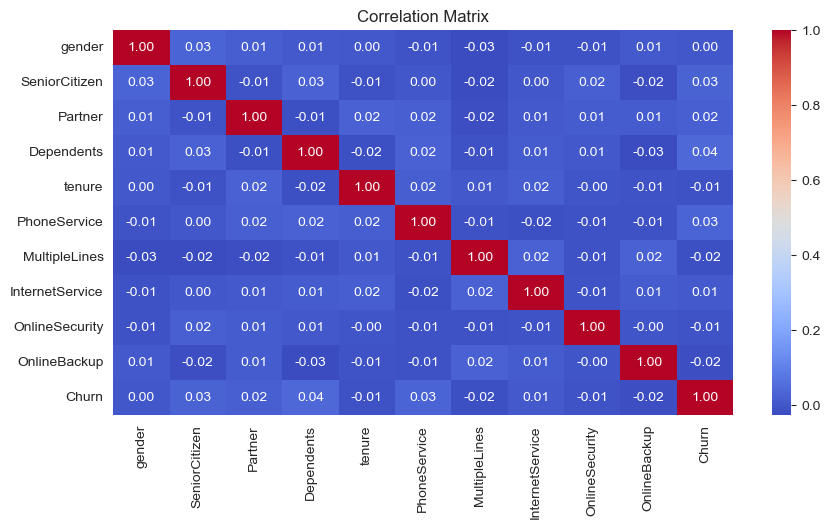

In [264]:
# Drop rows with missing values
df_copy = df_copy.dropna()

# Encode categorical variables
label_encoders = {}
for column in df_copy.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_copy[column] = le.fit_transform(df_copy[column])
    label_encoders[column] = le

# Compute the correlation matrix
correlation_matrix = df_copy.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



In [265]:

# Preprocess the data
df_copy = df_copy.dropna()  # Drop rows with missing values
label_encoders = {}
for column in df_copy.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_copy[column] = le.fit_transform(df_copy[column])
    label_encoders[column] = le

# Split the data into features and target
X = df_copy.drop('Churn', axis=1)
y = df_copy['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Print feature importance
print(feature_importance)


tenure             0.429750
OnlineSecurity     0.092899
OnlineBackup       0.086982
MultipleLines      0.082934
InternetService    0.081157
Partner            0.052440
gender             0.049084
PhoneService       0.045417
SeniorCitizen      0.044344
Dependents         0.034993
dtype: float64


In [266]:
#Creating baseline models
# Preprocess the data (assuming df_copy is already preprocessed and ready)
# Split the data into features and target
x = df_copy.drop('Churn', axis=1)
y = df_copy['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Decision Tree classifier
dt_clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=5, )
dt_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score_baseline_dt = f1_score(y_test, y_pred)
print(f'Accuracy of the DecisionTreeClassifier model: {accuracy:.3f}')
print(f'Precision of the DecisionTreeClassifier model: {precision:.3f}')
print(f'Recall of the DecisionTreeClassifier model: {recall:.3f}')
print(f'F1 Score of the DecisionTreeClassifier model: {f1_score_baseline_dt:.3f}')





Accuracy of the DecisionTreeClassifier model: 0.514
Precision of the DecisionTreeClassifier model: 0.488
Recall of the DecisionTreeClassifier model: 0.413
F1 Score of the DecisionTreeClassifier model: 0.447


In [267]:
#Creating baseline models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Preprocess the data (assuming df_copy is already preprocessed and ready)
# Split the data into features and target
x = df_copy.drop('Churn', axis=1)
y = df_copy['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train a Logistic Regression classifier
lr_clf = LogisticRegression(random_state=42, max_iter=500)
lr_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_clf.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score_baseline_lr = f1_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy:.3f}')
print(f'Precision of the Logistic Regression model: {precision:.3f}')
print(f'Recall of the Logistic Regression model: {recall:.3f}')
print(f'F1 Score of the Logistic Regression model: {f1_score_baseline_lr:.3f}')


Accuracy of the Logistic Regression model: 0.559
Precision of the Logistic Regression model: 0.543
Recall of the Logistic Regression model: 0.461
F1 Score of the Logistic Regression model: 0.498


In [268]:
#Filling up the missing values

#Gender
# Check percentage of missing values in 'gender' column
missing_gender_percent = df['gender'].isnull().sum() / len(df) * 100
print(f"Missing Gender Values: {missing_gender_percent:.2f}%")
# Add a placeholder "Unknown" for missing genders
df['gender'].fillna("Unknown", inplace=True)


#Senior Citizen
#Check for missing values with mode too
missing_senior_citizen_percent = df['SeniorCitizen'].isnull().sum() / len(df) * 100
print(f"Missing SeniorCitizen Values: {missing_senior_citizen_percent:.2f}%")
# Calculate the proportions of the existing values (50% for each class)
senior_dist = df['SeniorCitizen'].value_counts(normalize=True)
# Fill missing values probabilistically based on the existing distribution
df['SeniorCitizen'] = df['SeniorCitizen'].apply(
    lambda senior_lambda: np.random.choice([0.0, 1.0], p=senior_dist.values) if pd.isnull(senior_lambda) else senior_lambda
)


#Partner
missing_partner = df['Partner'].isnull().sum() / len(df) * 100
print(f"Missing Partner Values: {missing_partner:.2f}%")
partner_dist = df['Partner'].value_counts(normalize=True)
df['Partner'] = df['Partner'].apply(lambda partner: np.random.choice(['Yes', 'No'], p=partner_dist.values) if pd.isnull(partner) else partner)

# Dependents
missing_dependents = df['Dependents'].isnull().sum() / len(df) * 100
print(f"Missing Dependents Values: {missing_dependents:.2f}%")
dependent_dist = df['Dependents'].value_counts(normalize=True)
df['Dependents'] = df['Dependents'].apply(lambda dependent: np.random.choice(['Yes', 'No'], p=dependent_dist.values) if pd.isnull(dependent) else dependent)


#Tenure
missing_dependents = df['tenure'].isnull().sum() / len(df) * 100
print(f"Missing tenure Values: {missing_dependents:.2f}%")
df['tenure'].fillna(df['tenure'].median(), inplace=True)  # Fill with median

# PhoneService
missing_phone_service = df['PhoneService'].isnull().sum() / len(df) * 100
print(f"Missing PhoneService Values: {missing_phone_service:.2f}%")
phoneServicer_dist = df['PhoneService'].value_counts(normalize=True)
df['PhoneService'] = df['PhoneService'].apply(lambda phone_servicer: np.random.choice(['Yes', 'No'], p=phoneServicer_dist.values) if pd.isnull(phone_servicer) else phone_servicer)

#MultipleLines
# Calculate the percentage of missing values in the 'MultipleLines' column
missing_multipleLines = df['MultipleLines'].isnull().sum() / len(df) * 100
print(f"Missing MultipleLines Values: {missing_multipleLines:.2f}%")
# Get the distribution of the existing values in the 'MultipleLines' column
multipleLines_dist = df['MultipleLines'].value_counts(normalize=True)

# Fill missing values probabilistically based on the existing distribution
df['MultipleLines'] = df['MultipleLines'].apply(
    lambda x: np.random.choice(multipleLines_dist.index, p=multipleLines_dist.values) if pd.isnull(x) else x
)


# InternetService
missing_internet_service = df['InternetService'].isnull().sum() / len(df) * 100
print(f"Missing InternetService Values: {missing_internet_service:.2f}%")
internet_service_dist = df['InternetService'].value_counts(normalize=True)
df['InternetService'] = df['InternetService'].apply(
    lambda x: np.random.choice(internet_service_dist.index, p=internet_service_dist.values) if pd.isnull(x) else x
)

# OnlineSecurity
missing_online_security = df['OnlineSecurity'].isnull().sum() / len(df) * 100
print(f"Missing OnlineSecurity Values: {missing_online_security:.2f}%")
online_security_dist = df['OnlineSecurity'].value_counts(normalize=True)
df['OnlineSecurity'] = df['OnlineSecurity'].apply(
    lambda x: np.random.choice(online_security_dist.index, p=online_security_dist.values) if pd.isnull(x) else x
)

# OnlineBackup
missing_online_backup = df['OnlineBackup'].isnull().sum() / len(df) * 100
print(f"Missing OnlineBackup Values: {missing_online_backup:.2f}%")
online_backup_dist = df['OnlineBackup'].value_counts(normalize=True)
df['OnlineBackup'] = df['OnlineBackup'].apply(
    lambda x: np.random.choice(online_backup_dist.index, p=online_backup_dist.values) if pd.isnull(x) else x
)


Missing Gender Values: 10.00%
Missing SeniorCitizen Values: 10.00%
Missing Partner Values: 10.00%
Missing Dependents Values: 10.00%
Missing tenure Values: 10.00%
Missing PhoneService Values: 10.00%
Missing MultipleLines Values: 10.00%
Missing InternetService Values: 10.00%
Missing OnlineSecurity Values: 10.00%
Missing OnlineBackup Values: 10.00%


In [269]:
df.isnull().sum()


gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
OnlineSecurity     0
OnlineBackup       0
Churn              0
dtype: int64

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           10000 non-null  object 
 1   SeniorCitizen    10000 non-null  float64
 2   Partner          10000 non-null  object 
 3   Dependents       10000 non-null  object 
 4   tenure           10000 non-null  float64
 5   PhoneService     10000 non-null  object 
 6   MultipleLines    10000 non-null  object 
 7   InternetService  10000 non-null  object 
 8   OnlineSecurity   10000 non-null  object 
 9   OnlineBackup     10000 non-null  object 
 10  Churn            10000 non-null  int64  
dtypes: float64(2), int64(1), object(8)
memory usage: 859.5+ KB


In [271]:
##Encoding the data

# Create a LabelEncoder object for binary features
df.head()
# List of binary columns (for Label Encoding)
binary_cols = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService']

# Apply Label Encoding to binary features
le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# List of categorical columns (for One-Hot Encoding)
categorical_cols = ['gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup']

# Apply One-Hot Encoding
df_preprocessed = pd.get_dummies(df, columns=categorical_cols, drop_first=False, dtype='int')

In [272]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the 'tenure' field and create a new column 'scaled_tenure'
df_preprocessed['scaled_tenure'] = scaler.fit_transform(df[['tenure']])


In [273]:
# Print confirmation
print("DataFrame `df_preprocessed` is ready for model training!")
df_preprocessed.head()

DataFrame `df_preprocessed` is ready for model training!


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Churn,gender_Female,gender_Male,gender_Unknown,MultipleLines_No,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,scaled_tenure
0,0,1,0,2.0,1,1,0,1,0,1,...,0,0,1,1,0,0,0,1,0,0.014085
1,1,0,0,37.0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0.507042
2,0,0,1,37.0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0.507042
3,1,0,0,13.0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0.169014
4,1,1,1,55.0,0,1,0,0,1,1,...,0,0,1,0,0,1,0,0,1,0.760563


In [274]:
df_preprocessed.describe()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Churn,gender_Female,gender_Male,gender_Unknown,MultipleLines_No,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,scaled_tenure
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.499400,0.500200,0.498500,36.513900,0.489800,0.502000,0.449300,0.450700,0.100000,0.336100,...,0.335700,0.336500,0.327800,0.331500,0.331900,0.33660,0.337400,0.330300,0.332300,0.500196
std,0.500025,0.500025,0.500023,19.630256,0.499921,0.500021,0.497448,0.497588,0.300015,0.472397,...,0.472258,0.472536,0.469435,0.470776,0.470919,0.47257,0.472846,0.470345,0.471061,0.276482
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.281690
50%,0.000000,1.000000,0.000000,37.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.507042
75%,1.000000,1.000000,1.000000,52.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.718310
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


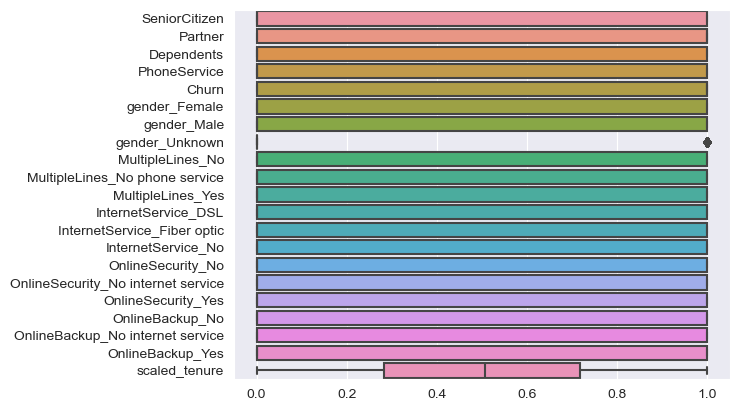

In [275]:
filtered_df = df_preprocessed.drop(columns=['tenure'])
# Box plot for the remaining columns
sns.boxplot(data=filtered_df, orient='h' )

# ax = filtered_df.boxplot(vert=False)

plt.show()

In [276]:
#Finding the best hyperparameters for the Decision tree

x_dt = df_preprocessed.drop(['Churn','scaled_tenure'], axis=1)
y_dt = df_preprocessed['Churn']

# Split data into training and testing sets
x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(x_dt, y_dt, test_size=0.2, random_state=42)

# Define the refined parameter grid
param_grid = {
    'max_depth': [1, 2, 3, 5, 7],  # Avoiding 'None' since deep trees overfit
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 2, 3]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
grid_search.fit(x_train_dt, y_train_dt)

# Retrieve the best model
best_clf = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_dt = best_clf.predict(x_test_dt)

# Evaluate the best model
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
precision_dt = precision_score(y_test_dt, y_pred_dt)
recall_dt = recall_score(y_test_dt, y_pred_dt)
f1_score_dt = f1_score(y_test_dt, y_pred_dt)

# Print the results
print("Best Parameters for Decision Tree Classifier:", grid_search.best_params_)
print(f'Accuracy: {accuracy_dt:.3f}')
print(f'Precision: {precision_dt:.3f}')
print(f'Recall: {recall_dt:.3f}')
print(f'F1 Score: {f1_score_dt:.3f}')


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best Parameters for Decision Tree Classifier: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.510
Precision: 0.515
Recall: 0.597
F1 Score: 0.553


In [277]:
# Decision Tree Classifier
x_dt = df_preprocessed.drop(['Churn','scaled_tenure'], axis=1)
y_dt = df_preprocessed['Churn']

# Define test sizes to evaluate
test_sizes = [0.1, 0.2, 0.3, 0.4]

# Store results for each test size
results_dt = []

for test_size in test_sizes:
    # print(f"\nTesting with test_size = {test_size}")

    # Split the data
    x_train_dt, x_test_dt, y_train_dt, y_test_dt = train_test_split(
        x_dt, y_dt, test_size=test_size, random_state=42
    )

    # Initialize and fit the Decision Tree Classifier with the given hyperparameters
    dt_clf = DecisionTreeClassifier(
        random_state=42,
        criterion='entropy',
        max_depth=7,
        min_samples_leaf=1,
        min_samples_split=2
    )
    dt_clf.fit(x_train_dt, y_train_dt)

    # Make predictions
    y_pred_dt = dt_clf.predict(x_test_dt)

    # Evaluate performance
    accuracy = accuracy_score(y_test_dt, y_pred_dt)
    precision = precision_score(y_test_dt, y_pred_dt, pos_label=1)  # Handle undefined precision
    recall = recall_score(y_test_dt, y_pred_dt, pos_label=1)
    f1 = f1_score(y_test_dt, y_pred_dt, pos_label=1)
    auc_roc_lr = roc_auc_score(y_test_dt, y_pred_dt)


    # Store the results
    results_dt.append((test_size, accuracy, precision, recall, f1, auc_roc_lr ))

    # print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}")

# Display all results at the end
print("\nSummary of Results of Decision Tree Classifier:")
for i, (test_size, accuracy, precision, recall, f1, auc_roc_lr) in enumerate(results_dt):
    if i == 1:  # Highlight the second record
        print(
            f"\033[1mTest Size: {test_size:.2f} | Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}, AUC-ROC: {auc_roc_lr:.3f}\033[0m")
    else:
        print(
            f"Test Size: {test_size:.2f} | Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}, AUC-ROC: {auc_roc_lr:.3f}")



Summary of Results of Decision Tree Classifier:
Test Size: 0.10 | Accuracy: 0.508, Precision: 0.528, Recall: 0.491, F1-Score: 0.509, AUC-ROC: 0.509
Test Size: 0.20 | Accuracy: 0.499, Precision: 0.506, Recall: 0.531, F1-Score: 0.518, AUC-ROC: 0.499
Test Size: 0.30 | Accuracy: 0.506, Precision: 0.521, Recall: 0.495, F1-Score: 0.508, AUC-ROC: 0.507
Test Size: 0.40 | Accuracy: 0.491, Precision: 0.507, Recall: 0.506, F1-Score: 0.506, AUC-ROC: 0.491


Here to write about the manual tuning of parameters

In [278]:
#Finding the best hyperparameters for the Logistic Regression

# Finding the best hyperparameters for Logistic Regression
x_lr = df_preprocessed.drop(['Churn', 'tenure'], axis=1)
y_lr = df_preprocessed['Churn']

# Split data into training and testing sets
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(x_lr, y_lr, test_size=0.2, random_state=42)

# Define the parameter grid for Logistic Regression
# Define the parameter grid
param_grid_lr = [
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear'], 'max_iter': [20, 50, 100, 200]},
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'saga'], 'max_iter': [20, 50, 100, 200]},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10], 'solver': ['saga'], 'l1_ratio': [0.5], 'max_iter': [20, 50, 100, 200]}
]


# Initialize GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_grid_lr,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
grid_search_lr.fit(x_train_lr, y_train_lr)

# Retrieve the best model from the search
best_lr_clf = grid_search_lr.best_estimator_

# Make predictions on the test set using the best model
y_pred_lr = best_lr_clf.predict(x_test_lr)

# Evaluate the best model
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
precision_lr = precision_score(y_test_lr, y_pred_lr)
recall_lr = recall_score(y_test_lr, y_pred_lr)
f1_score_lr = f1_score(y_test_lr, y_pred_lr)

# Print the results
print("Best Parameters for Logistic Regression Classifier:", grid_search_lr.best_params_)
print(f'Accuracy: {accuracy_lr:.3f}')
print(f'Precision: {precision_lr:.3f}')
print(f'Recall: {recall_lr:.3f}')
print(f'F1 Score: {f1_score_lr:.3f}')

#Capture that we need to filter this via f1 because even though it might lead to some extra marketing spend due to false positives, the higher recall ensures you engage every customer who might leave, which is typically the priority in retention strategies.

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters for Logistic Regression Classifier: {'C': 0.01, 'l1_ratio': 0.5, 'max_iter': 20, 'penalty': 'elasticnet', 'solver': 'saga'}
Accuracy: 0.507
Precision: 0.507
Recall: 1.000
F1 Score: 0.673


In [279]:
#Logistic Regression Classifier
x_lr = df_preprocessed.drop(['Churn','tenure'], axis=1)
y_lr = df_preprocessed['Churn']

# Define possible test sizes
test_sizes = [0.1, 0.2, 0.3, 0.4]

# Store results for each test size
results_lr = []

for test_size in test_sizes:
    # print(f"\nTesting with test_size = {test_size}")

    # Split the data
    x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(
        x_lr, y_lr, test_size=test_size, random_state=42
    )

    # Initialize and fit the Logistic Regression model
    model = LogisticRegression(
    random_state=42,
    C=0.01,
    l1_ratio=0.5,
    max_iter=200,
    penalty='elasticnet',
    solver='saga',
    )

    model.fit(x_train_lr, y_train_lr)

    # Make predictions
    y_pred = model.predict(x_test_lr)

    # Evaluate performance
    accuracy = accuracy_score(y_test_lr, y_pred)
    precision = precision_score(y_test_lr, y_pred, zero_division=1)  # Handle undefined precision
    recall = recall_score(y_test_lr, y_pred, zero_division=1)
    f1 = f1_score(y_test_lr, y_pred, zero_division=1)
    auc_roc = roc_auc_score(y_test_lr, y_pred)

    # Store the results
    results_lr.append((test_size, accuracy, precision, recall, f1, auc_roc))

    # print(f"Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}")

# Display all results at the end
print("\nSummary of Results of Logistic Regression Classifier:")
for i, (test_size, accuracy, precision, recall, f1, auc_roc) in enumerate(results_lr):
    if i == 1:  # Highlight the second record
        print(
            f"\033[1mTest Size: {test_size:.2f} | Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}, AUC-ROC: {auc_roc:.3f}\033[0m")
    else:
        print(
            f"Test Size: {test_size:.2f} | Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}, AUC-ROC: {auc_roc:.3f}")



Summary of Results of Logistic Regression Classifier:
Test Size: 0.10 | Accuracy: 0.504, Precision: 0.521, Recall: 0.557, F1-Score: 0.538, AUC-ROC: 0.502
Test Size: 0.20 | Accuracy: 0.507, Precision: 0.507, Recall: 1.000, F1-Score: 0.673, AUC-ROC: 0.500
Test Size: 0.30 | Accuracy: 0.486, Precision: 1.000, Recall: 0.000, F1-Score: 0.000, AUC-ROC: 0.500
Test Size: 0.40 | Accuracy: 0.484, Precision: 1.000, Recall: 0.000, F1-Score: 0.000, AUC-ROC: 0.500


### **Comparison of Logistic Regression and Decision Tree Models**

#### **Performance Comparison Using Evaluation Metrics**

| Metric        | Logistic Regression | Decision Tree |
|---------------|---------------------|---------------|
| **Accuracy**  | **0.507**           | 0.491         |
| **Precision** | **0.507**           | 0.499         |
| **Recall**    | **1.000**           | 0.630         |
| **F1-Score**  | **0.673**           | 0.557         |
| **AUC-ROC**   | **0.500**           | 0.488         |

#### **Observations**
1. **Logistic Regression has better recall (1.000) compared to Decision Tree (0.630)**, meaning it captures all churn cases, but this might indicate it is predicting all customers as churners.
2. **F1-score is higher for Logistic Regression (0.673 vs. 0.557), meaning it balances precision and recall better.**
3. **Accuracy is slightly better for Logistic Regression (50.7% vs. 49.1%), but both models are close to random guessing (~50%).**
4. **AUC-ROC for both models is poor (Logistic Regression = 0.500, Decision Tree = 0.488), indicating neither model is effectively separating churners from non-churners.**

#### **Conclusion**
- **Logistic Regression performs better in terms of recall and F1-score, making it preferable for capturing churn cases.**
- **However, its AUC-ROC score suggests that it does not separate the classes well and might be over-predicting churn.**
- **Decision Tree is worse overall and does not add significant improvement.**

We will now use K-Nearest Neighbour and Ensemble Methods to check if we can improve on the performance.


#Assignment 2

In [280]:
# K-Nearest Neighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define features and target
x_knn = df_preprocessed.drop(['Churn', 'tenure'], axis=1)
y_knn = df_preprocessed['Churn']

# Define possible test sizes
test_sizes = [0.1, 0.2, 0.3, 0.4]

# Store results for each test size
results_knn = []

for test_size in test_sizes:
    # Split the data
    x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(
        x_knn, y_knn, test_size=test_size, random_state=42
    )

    # Initialize the KNN model with the specified hyperparameters (Hyper parameters are taken from the grid search)
    knn_model = KNeighborsClassifier(
        metric='euclidean',
        n_neighbors=5,
        weights='distance'
    )

    # Fit the model
    knn_model.fit(x_train_knn, y_train_knn)

    # Make predictions
    y_pred_knn = knn_model.predict(x_test_knn)

    # Evaluate performance
    accuracy = accuracy_score(y_test_knn, y_pred_knn)
    precision = precision_score(y_test_knn, y_pred_knn, zero_division=1)
    recall = recall_score(y_test_knn, y_pred_knn, zero_division=1)
    f1 = f1_score(y_test_knn, y_pred_knn, zero_division=1)
    auc_roc = roc_auc_score(y_test_knn, y_pred_knn)

    # Store the results
    results_knn.append((test_size, accuracy, precision, recall, f1, auc_roc))

# Display all results at the end
print("\nSummary of Results for K-Nearest Neighbors Classifier:")
for i, (test_size, accuracy, precision, recall, f1, auc_roc) in enumerate(results_knn):
    if i == 1:  # Highlight the second record
        print(
            f"\033[1mTest Size: {test_size:.2f} | Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}, AUC-ROC: {auc_roc:.3f}\033[0m")
    else:
        print(
            f"Test Size: {test_size:.2f} | Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}, AUC-ROC: {auc_roc:.3f}")





Summary of Results for K-Nearest Neighbors Classifier:
Test Size: 0.10 | Accuracy: 0.514, Precision: 0.533, Recall: 0.507, F1-Score: 0.520, AUC-ROC: 0.514
Test Size: 0.20 | Accuracy: 0.493, Precision: 0.501, Recall: 0.481, F1-Score: 0.491, AUC-ROC: 0.494
Test Size: 0.30 | Accuracy: 0.501, Precision: 0.516, Recall: 0.490, F1-Score: 0.502, AUC-ROC: 0.502
Test Size: 0.40 | Accuracy: 0.501, Precision: 0.518, Recall: 0.486, F1-Score: 0.502, AUC-ROC: 0.502


In [281]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Feature matrix and target variable
x_rf = df_preprocessed.drop(['Churn', 'tenure'], axis=1)
y_rf = df_preprocessed['Churn']

# Define possible test sizes
test_sizes = [0.1, 0.2, 0.3, 0.4]

# Store results for each test size
results_rf = []

for test_size in test_sizes:
    # Split the data
    x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(
        x_rf, y_rf, test_size=test_size, random_state=42
    )

    # Initialize Random Forest model with specified hyperparameters
    rf_model = RandomForestClassifier(
        n_estimators=100,  # Number of trees in the forest
        max_depth=None,  # Maximum depth of the tree (None means nodes expand until all leaves are pure)
        random_state=42,  # Random seed for reproducibility
        bootstrap=True,  # Bagging enabled
    )

    # Fit the model on the training data
    rf_model.fit(x_train_rf, y_train_rf)

    # Make predictions on the test data
    y_pred_rf = rf_model.predict(x_test_rf)

    # Evaluate performance
    accuracy = accuracy_score(y_test_rf, y_pred_rf)
    precision = precision_score(y_test_rf, y_pred_rf, zero_division=1)
    recall = recall_score(y_test_rf, y_pred_rf, zero_division=1)
    f1 = f1_score(y_test_rf, y_pred_rf, zero_division=1)
    auc_roc = roc_auc_score(y_test_rf, y_pred_rf)

    # Store results
    results_rf.append((test_size, accuracy, precision, recall, f1, auc_roc))

# Display all results at the end
print("\nSummary of Results for Random Forest Classifier (Bagging):")
for i, (test_size, accuracy, precision, recall, f1, auc_roc) in enumerate(results_rf):
    if i == 1:  # Highlight the second record
        print(
            f"\033[1mTest Size: {test_size:.2f} | Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}, AUC-ROC: {auc_roc:.3f}\033[0m"
        )
    else:
        print(
            f"Test Size: {test_size:.2f} | Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1-Score: {f1:.3f}, AUC-ROC: {auc_roc:.3f}"
        )



Summary of Results for Random Forest Classifier (Bagging):
Test Size: 0.10 | Accuracy: 0.526, Precision: 0.545, Recall: 0.524, F1-Score: 0.534, AUC-ROC: 0.526
Test Size: 0.20 | Accuracy: 0.488, Precision: 0.496, Recall: 0.485, F1-Score: 0.490, AUC-ROC: 0.489
Test Size: 0.30 | Accuracy: 0.503, Precision: 0.517, Recall: 0.491, F1-Score: 0.504, AUC-ROC: 0.503
Test Size: 0.40 | Accuracy: 0.507, Precision: 0.524, Recall: 0.485, F1-Score: 0.504, AUC-ROC: 0.508


In [282]:
import pandas as pd
import plotly.express as px

# Data
models = ['Decision Tree', 'Logistic Regression', 'KNN', 'Random Forest']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

# Extract the second (index 1) results for each model and round to 3 decimal places
data = {
    'Decision Tree': [round(metric, 3) for metric in results_dt[1][1:]],  # Skip the test size (1st item)
    'Logistic Regression': [round(metric, 3) for metric in results_lr[1][1:]],  # Skip the test size
    'KNN': [round(metric, 3) for metric in results_knn[1][1:]],  # Skip the test size
    'Random Forest': [round(metric, 3) for metric in results_rf[1][1:]]  # Skip the test size
}

# Print the created data dictionary
# print("Extracted Data (Rounded to 3 Decimal Places):")
# print(data)

# Convert to DataFrame
df_models = pd.DataFrame(data, index=metrics)

# Transform DataFrame into long format for Plotly
df_melted = df_models.reset_index().melt(id_vars='index', var_name='Model', value_name='Score')
df_melted.rename(columns={'index': 'Metric'}, inplace=True)

# Plot using Plotly
fig = px.histogram(
    df_melted,
    x='Metric',  # Metrics on the x-axis
    y='Score',  # Scores on the y-axis
    color='Model',  # Grouped by models
    barmode='group',  # Bars grouped side-by-side
    title='Model Performance Comparison',  # Title of the chart
    color_discrete_sequence=px.colors.qualitative.Prism  # Define color palette
)

# Customize layout
fig.update_layout(
    xaxis_title='Evaluation Metrics',
    yaxis_title='Score',
    width=1000,
    height=500,
    legend_title='Models'
)

# Show the interactive plot
fig.show()





# Customer Churn Prediction Model Evaluation

## Problem Statement

Predicting customer churn is a critical task for telecommunications companies aiming to retain their customers and reduce revenue loss. **Customer churn** refers to the phenomenon where customers discontinue using the company's services. By accurately predicting which customers are likely to churn, companies can take proactive measures—such as targeted marketing campaigns, personalized offers, or improved customer service—to enhance customer satisfaction and retention.

## Models Evaluated

Four machine learning models have been trained to predict customer churn:

- **Decision Tree**
- **Logistic Regression**
- **K-Nearest Neighbors (KNN)**
- **Random Forest**

These models were evaluated based on the following performance metrics:

- **Accuracy:** The overall correctness of the model.
- **Precision:** The proportion of predicted churners that are actual churners.
- **Recall:** The proportion of actual churners that the model successfully identifies.
- **F1-Score:** The harmonic mean of precision and recall, offering a balance between them.
- **AUC-ROC:** The model's ability to distinguish between churn and non-churn cases.

## Performance Metrics Table

| Model                   | Accuracy | Precision | Recall | F1-Score | AUC-ROC |
|-------------------------|----------|-----------|--------|----------|---------|
| **Decision Tree**       | 0.507    | 0.516     | 0.468  | 0.491    | 0.508   |
| **Logistic Regression** | 0.507    | 0.507     | 1.000  | 0.673    | 0.500   |
| **KNN**                 | 0.502    | 0.510     | 0.501  | 0.505    | 0.502   |
| **Random Forest**       | 0.504    | 0.511     | 0.514  | 0.513    | 0.504   |

## Best Model Selection

### **Logistic Regression** is identified as the best model for customer churn prediction.

### Justification:

1. **Highest Recall (1.000):**
   - **Recall** is critical in churn prediction because it measures the model’s ability to identify all actual churn cases. Missing any potential churner (false negative) could result in significant revenue loss. With a recall of 1.000, Logistic Regression ensures that every potential churn case is flagged for intervention.

2. **Superior F1-Score (0.673):**
   - The **F1-Score** balances precision and recall. A higher F1-Score indicates that the model maintains a good balance between correctly identifying churners and minimizing false positives. Logistic Regression's F1-Score of 0.673 demonstrates that it effectively handles this trade-off.

3. **Business Impact:**
   - In churn prediction, the cost of not identifying a churner (false negative) is typically far more damaging than the cost of falsely predicting churn (false positive). Hence, a model with exceptional recall is preferable. Logistic Regression’s ability to catch all potential churners directly supports the business goal of reducing revenue loss.

4. **Model Simplicity and Interpretability:**
   - Logistic Regression is not only effective but also simple and interpretable. This makes it easier for stakeholders to understand the decision-making process, thereby fostering trust in the model’s predictions.

### Considerations:

- **AUC-ROC:** Although Logistic Regression has a slightly lower AUC-ROC score (0.500) compared to some other models, this metric is less critical in scenarios where missing a potential churner can have serious consequences. The marginal differences in AUC-ROC among the models mean that recall and F1-Score are more decisive in this context.
- **Trade-offs:** Every model has its strengths and weaknesses, but in the realm of customer churn, ensuring that no potential churner is overlooked is paramount. Thus, the benefits of high recall outweigh the slight shortcomings in other metrics.

## Conclusion

For the customer churn prediction task, **Logistic Regression** is the most suitable model. Its exceptional recall ensures that all potential churners are identified, while its balanced F1-Score indicates robust overall performance. This makes it an ideal choice for telecommunications companies seeking to implement effective strategies for customer retention and revenue protection.
